<center>
<h2 style="color:blue;font-size:30px;">Artificial Intelligence CS-414</h2>
<h3 style="color:purple">Assignment 3</h3>
 </center>

<br>

<h3 style="color:purple">Problem 1.</h3>
<h4 style="color:green">Transportation Problem</h4>
<p>We have as street with blocks numbered from 1 to n. Walking from s to s+1 takes 1 minute. Running from s to s+3 takes 1.5minutes. Taking a magic tram from s to 2s takes 2 minutes. How to travel from 1 to n in the least time?
Apply Depth first search, breadth first search, dynamic programming and uniform cost search to find a solution. You can assume costs to zero and constants where deemed necessary.</p>

In [1]:
class TransportationProblem(object):
    def __init__(self, N, weights=None):
        self.N = N
        self.weights = weights
    def startState(self):
        return 1
    def isEnd(self, state):
        return state == self.N
    def succAndCost(self, state):
        result = []
        if self.weights is not None:
            if state+1<=self.N:
                result.append(('walk', state+1, self.weights['walk']))
            if state+3<=self.N:
                result.append(('jump', state+(1.5), self.weights['jump']))
            if state*2<=self.N:
                result.append(('tram', state*2, self.weights['tram']))
        else: 
            if state + 1 <= self.N:
                result.append(('walk', state + 1, 1))
            if state + 3 <= self.N:
                result.append(('jump', state + 1.5, 1.5))
            if state * 2 <= self.N:
                result.append(('tram', state * 2, 2))
            
        return result
    def successors(self, state):
        result = []
        if state + 1 <= self.N:
            result.append(('walk', state + 1))
        if state + 3 <= self.N:
            result.append(('jump', state + 1.5))
        if state * 2 <= self.N:
            result.append(('tram', state * 2))
        return result


In [2]:
def printSolution(solution):
    totalCost, history = solution
    print('totalCost: {}'.format(totalCost))
    for item in history:
        print(item)

<h4 style="color:orange"><bold>i - BackTracking Search</bold></h4>

In [31]:
def backtrackingSearch(problem):
    best = {
        'cost': float('+inf'),
        'history': None
    }
    def recurse(state, history, totalCost):
        if problem.isEnd(state):
            if totalCost<best['cost']:
                best['cost'] = totalCost
                best['history'] = history
            return
        for action, newState, cost in problem.succAndCost(state):
            recurse(newState, history+[(action, newState, cost)], totalCost+cost)
    recurse(problem.startState(), history=[], totalCost=0)
    return (best['cost'], best['history'])

In [32]:
problem = TransportationProblem(N=25)
printSolution(backtrackingSearch(problem))

totalCost: 9
('walk', 2, 1)
('walk', 3, 1)
('tram', 6, 2)
('tram', 12, 2)
('tram', 24, 2)
('walk', 25, 1)


<br>
<h4 style="color:orange"><bold>ii - Dynamic Programming</bold></h4>

In [5]:
def dynamicProgramming(problem):
    cache = {}  
    
    def futureCost(state):
        if problem.isEnd(state):
            return 0, []
        if state in cache:
            return cache[state]
        
        successors = problem.succAndCost(state)

        if not successors:
            return float('inf'), []  
        
        min_cost = float('inf')
        optimal_history = []
        for action, newState, cost in successors:
            cost_future, history_future = futureCost(newState)
            if cost + cost_future < min_cost:
                min_cost = cost + cost_future
                optimal_history = [action] + history_future
        
        cache[state] = (min_cost, optimal_history)
        return min_cost, optimal_history
    
    totalCost, history = futureCost(problem.startState())
    return totalCost, history


In [6]:
printSolution(dynamicProgramming(problem))

totalCost: 9
walk
walk
tram
tram
tram
walk


<br>
<h4 style="color:orange"><bold>iii - Depth First Search</bold></h4>

In [7]:
def dfs(problem):
    best = {
        'cost': float('inf'),
        'history': None
    }

    def recurse(state, history, totalCost):
        if problem.isEnd(state):
            if totalCost < best['cost']:
                best['cost'] = totalCost
                best['history'] = history
            return

        for action, newState in problem.successors(state):
            cost = 0  # Assuming cost of all edges as 0
            recurse(newState, history + [(action, newState)], totalCost + cost)

    recurse(problem.startState(), history=[], totalCost=0)
    return (best['cost'], best['history'])

In [8]:
N = 25 
problem = TransportationProblem(N)
solution = dfs(problem)
printSolution(solution)

totalCost: 0
('walk', 2)
('walk', 3)
('walk', 4)
('walk', 5)
('walk', 6)
('walk', 7)
('walk', 8)
('walk', 9)
('walk', 10)
('walk', 11)
('walk', 12)
('walk', 13)
('walk', 14)
('walk', 15)
('walk', 16)
('walk', 17)
('walk', 18)
('walk', 19)
('walk', 20)
('walk', 21)
('walk', 22)
('walk', 23)
('walk', 24)
('walk', 25)


<br>
<h4 style="color:orange"><bold>iv - Breadth First Search</bold></h4>

In [9]:
from collections import deque
def bfs(problem):
    best = {
        'cost': float('inf'),
        'history': None
    }

    queue = deque([(problem.startState(), [], 0)])  
    
    while queue:
        state, history, totalCost = queue.popleft()

        if problem.isEnd(state):
            if totalCost < best['cost']:
                best['cost'] = totalCost
                best['history'] = history
            continue

        for action, newState in problem.successors(state):
            cost = 4
            queue.append((newState, history + [(action, newState)], totalCost + cost))

    return (best['cost'], best['history'])

In [10]:
N = 25
problem = TransportationProblem(N)
solution = bfs(problem)
printSolution(solution)

totalCost: 24
('walk', 2)
('walk', 3)
('tram', 6)
('tram', 12)
('tram', 24)
('walk', 25)


<br>
<h4 style="color:orange"><bold>v - Uniform Cost Search</bold></h4>

In [41]:
import heapq
def uniformCostSearch(problem):
    best = {
        'cost': float('inf'),
        'history': None
    }

    priorityQueue = [] 

    heapq.heappush(priorityQueue, (0, problem.startState(), []))

    while priorityQueue:
        totalCost, state, history = heapq.heappop(priorityQueue)

        if problem.isEnd(state):
            if totalCost < best['cost']:
                best['cost'] = totalCost
                best['history'] = history
            continue

        for action, newState, cost in problem.succAndCost(state):
            newTotalCost = totalCost + cost
            heapq.heappush(priorityQueue, (newTotalCost, newState, history + [(action, newState)]))

    return (best['cost'], best['history'])

In [42]:
N = 25
problem = TransportationProblem(N)
solution = uniformCostSearch(problem)
printSolution(solution)

totalCost: 9
('walk', 2)
('walk', 3)
('tram', 6)
('tram', 12)
('tram', 24)
('walk', 25)


<h3 style="color:purple">Problem 2.</h3>
<h4 style="color:green">Markaz Location</h4>
<p>Use google map to identify the location of Markaz of different sectors in Islamabad. (e.g I-8 Markaz, I-10 Markaz etc.) and draw a graph between these identified Markaz and label the edges with the distances representing the cost from one to another Markaz. Choose source and destination from these Markaz randomly from any sector I as source to any other sector F or E as destination. Assume a suitable heuristic function to estimate value of each Markaz to destination and the apply uniform and A* search algorithms to find minimum cost path from source to destination. Analyze both algorithm and identify which one is more efficient and why? Efficiency can be measured in terms of number of nodes/Markaz explored during the searching process.</p>

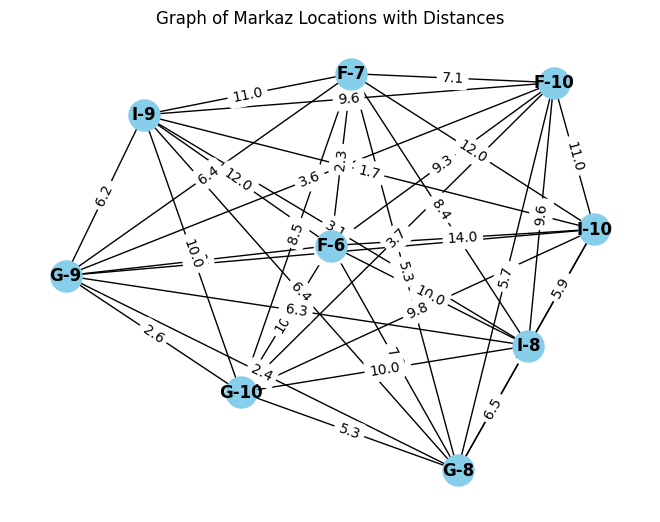

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

markaz_locations = ['F-6', 'F-7', 'F-10', 'G-8', 'G-9', 'G-10', 'I-8', 'I-9', 'I-10']
G.add_nodes_from(markaz_locations)

edges = [
    ('F-6', 'F-7', 2.3), ('F-6', 'F-10', 9.3), ('F-6', 'G-8', 7.2), ('F-6', 'G-9', 8.2), ('F-6', 'G-10', 10.0),
    ('F-6', 'I-8', 10.0), ('F-6', 'I-9', 12.0), ('F-6', 'I-10', 14.0),
    ('F-7', 'F-6', 2.3), ('F-7', 'F-10', 7.1), ('F-7', 'G-8', 5.3), ('F-7', 'G-9', 6.4), ('F-7', 'G-10', 8.5),
    ('F-7', 'I-8', 8.4), ('F-7', 'I-9', 11.0), ('F-7', 'I-10', 12.0),
    ('F-10', 'F-6', 9.3), ('F-10', 'F-7', 7.1), ('F-10', 'G-8', 5.7), ('F-10', 'G-9', 3.6), ('F-10', 'G-10', 3.7),
    ('F-10', 'I-8', 9.6), ('F-10', 'I-9', 9.6), ('F-10', 'I-10', 11.0),
    ('G-8', 'F-6', 7.2), ('G-8', 'F-7', 5.3), ('G-8', 'F-10', 5.7), ('G-8', 'G-9', 2.4), ('G-8', 'G-10', 5.3),
    ('G-8', 'I-8', 6.5), ('G-8', 'I-9', 6.4), ('G-8', 'I-10', 7.9),
    ('G-9', 'F-6', 8.2), ('G-9', 'F-7', 6.4), ('G-9', 'F-10', 3.6), ('G-9', 'G-8', 2.4), ('G-9', 'G-10', 2.6),
    ('G-9', 'I-8', 6.3), ('G-9', 'I-9', 6.2), ('G-9', 'I-10', 7.7),
    ('G-10', 'F-6', 10.0), ('G-10', 'F-7', 8.5), ('G-10', 'F-10', 3.7), ('G-10', 'G-8', 5.3), ('G-10', 'G-9', 2.6),
    ('G-10', 'I-8', 10.0), ('G-10', 'I-9', 10.0), ('G-10', 'I-10', 9.8),
    ('I-8', 'F-6', 10.0), ('I-8', 'F-7', 8.4), ('I-8', 'F-10', 9.6), ('I-8', 'G-8', 6.5), ('I-8', 'G-9', 6.3),
    ('I-8', 'G-10', 10.0), ('I-8', 'I-9', 3.1), ('I-8', 'I-10', 5.9),
    ('I-9', 'F-6', 12.0), ('I-9', 'F-7', 11.0), ('I-9', 'F-10', 9.6), ('I-9', 'G-8', 6.4), ('I-9', 'G-9', 6.2),
    ('I-9', 'G-10', 10.0), ('I-9', 'I-8', 3.1), ('I-9', 'I-10', 1.7),
    ('I-10', 'F-6', 14.0), ('I-10', 'F-7', 12.0), ('I-10', 'F-10', 11.0), ('I-10', 'G-8', 7.9), ('I-10', 'G-9', 7.7),
    ('I-10', 'G-10', 9.8), ('I-10', 'I-8', 5.9), ('I-10', 'I-9', 1.7)
]



G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold')
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Graph of Markaz Locations with Distances')
plt.show()


In [14]:
source = 'F-6'
destination = 'I-10'

In [15]:
def heuristic(node, destination, edge_distances):
    if node == destination:
        return 0 

    if (node, destination) in edge_distances:
        return edge_distances[(node, destination)]
    elif (destination, node) in edge_distances:
        return edge_distances[(destination, node)]
    else:
        return float('inf') 


<h2 style="color:orange"><bold>1: A* Search<bold/></h2>

In [16]:
def astar_search(graph, start, goal, edge_distances):
    frontier = [] 
    heapq.heappush(frontier, (0, start))  
    came_from = {}
    cost_so_far = {start: 0}
    explored_nodes = 0

    while frontier:
        current_cost, current_node = heapq.heappop(frontier)
        explored_nodes += 1

        if current_node == goal:
            path = []
            while current_node != start:
                path.append(current_node)
                current_node = came_from[current_node]
            path.append(start)
            path.reverse()
            return path, cost_so_far[goal], explored_nodes  

        for neighbor in graph[current_node]:
            weight = graph[current_node][neighbor]['weight']  
            new_cost = cost_so_far[current_node] + weight
            
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal, edge_distances) 
                heapq.heappush(frontier, (priority, neighbor))
                came_from[neighbor] = current_node

    return None, float('inf')

In [17]:
path_astar, total_cost_astar, explored_nodes_astar = astar_search(G, source, destination, edges)

if path_astar:
    print("A* Search Path:", path_astar)
    print("Total cost (A*):", total_cost_astar)
    print("Nodes explored (A*):", explored_nodes_astar)
else:
    print("No path found using A* Search")

A* Search Path: ['F-6', 'I-10']
Total cost (A*): 14.0
Nodes explored (A*): 2


<h2 style="color:orange"><bold>2: Uniform Cost Search<bold/></h2>

In [18]:
def uniform_cost_search(graph, start, goal):
    frontier = []  
    heapq.heappush(frontier, (0, start)) 
    came_from = {}
    cost_so_far = {start: 0}
    explored_nodes = 0

    while frontier:
        current_cost, current_node = heapq.heappop(frontier)
        explored_nodes += 1

        if current_node == goal:
            path = []
            while current_node != start:
                path.append(current_node)
                current_node = came_from[current_node]
            path.append(start)
            path.reverse()
            return path, cost_so_far[goal], explored_nodes  

        for neighbor in graph[current_node]: 
            weight = graph[current_node][neighbor]['weight']  
            new_cost = cost_so_far[current_node] + weight
            
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                heapq.heappush(frontier, (new_cost, neighbor))
                came_from[neighbor] = current_node

    return None, float('inf'), explored_nodes  

In [19]:
path_ucs, total_cost_ucs, explored_nodes_ucs = uniform_cost_search(G, source, destination)

if path_ucs:
    print("Uniform Cost Search Path:", path_ucs)
    print("Total cost (UCS):", total_cost_ucs)
    print("Nodes explored (UCS):", explored_nodes_ucs)
else:
    print("No path found using Uniform Cost Search")

Uniform Cost Search Path: ['F-6', 'I-9', 'I-10']
Total cost (UCS): 13.7
Nodes explored (UCS): 9


<h2 style="color:blue">Analysis:</h2>

<h3 style="color:purple">1- A* Search Efficiency:</h3>

<ol>
    <li>A* search explored a total of 2 nodes to find the path with a total cost of 14.0 units.</li>
<li>However, the total cost of the path found was slightly higher compared to UCS.</li>
    </ol>
<h3 style="color:purple">2- Uniform Cost Search Efficiency:</h3>

<ol>
    <li>UCS explored a total of 9 nodes to find the path with a total cost of 13.7 units.</li>
<li>Despite exploring more nodes, UCS found a path with a slightly lower total cost compared to A* search.</li>
    </ol>

<h2 style="color:blue">Comparison:</h2>

<p>A* Search explored significantly fewer nodes (2 nodes) compared to UCS (9 nodes) to find a path.
However, UCS found a path with a slightly lower total cost (13.7 units) compared to A* search (14.0 units).</p>
<h2 style="color:blue">Conclusion:</h2>
<p>In conclusion, both A* Search and UCS algorithms have their strengths and weaknesses. A* Search is more efficient in terms of the number of nodes explored due to its heuristic-guided approach, while UCS considers all possible paths leading to a lower-cost solution in this specific scenario. The choice between the two algorithms depends on the specific requirements of the problem: A* Search is beneficial for reducing the number of explored nodes, while UCS focuses on finding paths with lower total costs.</p>

<h3 style="color:purple">Problem 3.</h3>
<h4 style="color:green">Transportation Problem</h4>
<p>Consider the transportation problem with different number of blocks n. Prepare a labeled data set (at least 20 training examples) having problem instance as input and minimum cost path as target output (you can find the minimum cost path using running any search algorithm by assuming true parameter/action cost). Now assume that the action costs are unknown. Perform learning the cost function using structured perceptron.</p>

In [43]:
def predict(N, weights):
    problem = TransportationProblem(N, weights)
    totalCost, history = dynamicProgramming(problem)
    
    if isinstance(history[0], str):
        return history 
    else:
        return [actions for actions, _, _ in history]  


In [44]:
def generateExamples():
    trueWeights = {'walk': 1, 'jump':1.5, 'tram':2}
    return [(N, predict(N, trueWeights)) for N in range(5,26)]

In [45]:
import pandas as pd
examples = generateExamples()
df = pd.DataFrame(examples, columns=['N', 'Path'])
df

,N,Path
0,5,"[jump, tram]"
1,6,"[walk, walk, tram]"
2,7,"[walk, jump, tram]"
3,8,"[walk, walk, walk, tram]"
4,9,"[walk, walk, jump, tram]"
5,10,"[jump, tram, tram]"
6,11,"[walk, walk, walk, jump, tram]"
7,12,"[walk, walk, tram, tram]"
8,13,"[walk, walk, tram, tram, walk]"
9,14,"[walk, jump, tram, tram]"


In [46]:
def structuredPreceptron(df):
    weights = {'walk':0, 'jump':0, 'tram':0}
    examples = df.values.tolist()
    for t in range(100):
        numMistakes = 0
        for N, trueActions in examples:
            predActions = predict(N, weights)
            if predActions != trueActions:
                numMistakes+=1
            for action in trueActions:
                weights[action] -= 1
            for action in predActions:
                weights[action] += 1
        print('Iteration {}, numMistakes={}, weights={}'.format(t, numMistakes, weights))
        if numMistakes == 0:
            break

In [47]:
structuredPreceptron(df)

Iteration 0, numMistakes=15, weights={'walk': 3, 'jump': 5, 'tram': 4}
Iteration 1, numMistakes=11, weights={'walk': 3, 'jump': 9, 'tram': 4}
Iteration 2, numMistakes=10, weights={'walk': 4, 'jump': 7, 'tram': 8}
Iteration 3, numMistakes=0, weights={'walk': 4, 'jump': 7, 'tram': 8}


<br>

<h3 style="color:purple"><bold>Nasir Hussain</bold></h3>
<h3 style="color:purple"><bold>04072013040</bold></h3>
<h3 style="color:purple"><bold>BSCS VII</bold></h3>